## Q1. (To Explore Supervised Machine Learning)

**In this regression task we will predict the percentage of marks that a student is expected to
score based upon the number of hours they studied. This is a simple linear regression task as it
involves just two variables. Data can be found at http://bit.ly/w-data**

**What will be predicted score if a student study for 9.25 hrs in a day?**

### Table of Contents
[I. Importing Libraries](#library)

[II. Reading Dataset](#reading)

[III. EDA](#eda)

[IV. Model Building](#model)

[V. Model Evaluation](#evaluation)

### I. Importing libraries <a id='library'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

### II. Reading dataset <a id='reading'></a>

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
x = df.iloc[:, :-1].values   #input value
y = df.iloc[:, 1].values     #target value

In [6]:
print(x.shape,y.shape)

(25, 1) (25,)


### III. EDA <a id='eda'></a>

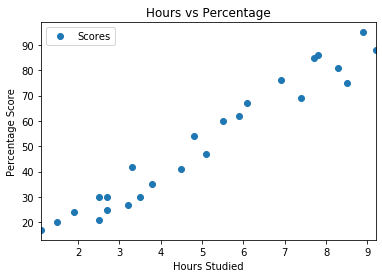

In [7]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
pearson_coef, p_value = stats.pearsonr(df["Hours"], df['Scores'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.9761906560220884  with a P-value of P = 9.132624467460325e-17


**Since Pearson Correlation Coefficient is very close to 1 and P-value is very small, Hours and Scores are highly positively correlated. From Graph we can say that more the Hours Studied more will be the Percentage Score.**

### IV. Model Building <a id='model'></a>

In [9]:
#Splitting the data in training and testing
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
#linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(x_train,y_train)  #fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

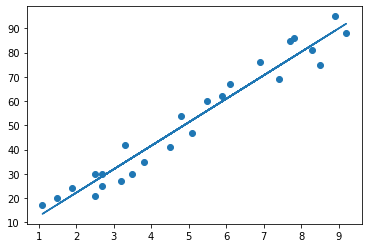

In [11]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [12]:
#predicting the value
y_pred = model.predict(x_test)
print(y_pred)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


**Predicting score for 9.25 hrs of study**

In [14]:
# You can also test with your own data
hours = 9.25
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261495


### V. Model Evaluation <a id='evaluation'></a>

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.920751190209927
